In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [108]:
data = pd.read_csv('DATA_APP.csv',sep=";",encoding='latin_1')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31,32,33,34,35,36,37,38,39,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [109]:
data_test = pd.read_csv('DATA_VAL.csv',sep=";",encoding='latin_1')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31,32,33,34,35,36,37,38,39,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [152]:
data_whole = pd.concat([data,data_test])

In [68]:
def replace_unknown(x, list, value):
    if x not in (list):
        return(value)
    else:
        return(x)

In [69]:
# fonction nécessaire pour modif_dat_cre_dmd
def periode_dat_cre_dmd(osb):
    if (int(osb[0:2])<=7):
        temp = "1p"
    elif (int(osb[0:2])<=15):
        temp = "2p"
    elif (int(osb[0:2])<=23):
        temp = "3p"
    else:
        temp = "4p"
    return(temp)

# fonction qui traite la colonne dat_cre_dmd
def modif_dat_cre_dmd(df):
    newdf = pd.DataFrame()
    newdf['periode_dmd'] = df['dat_cre_dmd'].apply(periode_dat_cre_dmd)
    newdf = pd.get_dummies(newdf,columns=["periode_dmd"],drop_first=False)
    newdf['annee_dmd'] = df['dat_cre_dmd'].str[-4:]
    newdf = pd.get_dummies(newdf,columns=["annee_dmd"],drop_first=False)
    newdf['mois_dmd'] = df['dat_cre_dmd'].str[2:5]
    newdf = pd.get_dummies(newdf,columns=["mois_dmd"],drop_first=False)
    return(newdf) 

In [70]:
# fonction nécessaire pour les montants
def PlageMontant(p): 
    # 4 plages : p < 151, 150 < p < 201, 200 < p < 401, 400 < p
    # Valeurs manquantes traitées à part
    if p<151:
        temp = "<151"
    elif p<201:
        temp = "150<p<201"
    elif p<401:
        temp = "200<p<401"
    elif p>400:
        temp = "400<t"
    else:
        temp = "Manquant"
    return(temp)

def ProcessMontant(df):
    new_df = pd.DataFrame()
    new_df['mnt_ach'] = df['mnt_ach'].apply(PlageMontant)
    return pd.get_dummies(new_df, drop_first = False)

In [71]:
# fonction nécessaire pour modif_heure
def periode_heure(h):
    if h<6:
        temp = "0h-6h"
    elif h<12:
        temp = "6h-12h"
    elif h<18:
        temp = "12h-18h"
    elif h<24:
        temp = "18h-0h"
    else:
        temp = "heure_inconnue"
    return(temp)
  
# fonction qui traite la colonne heure
def modif_heure(df):
    newdf = pd.DataFrame()
    newdf['periode_heure'] = df['heure'].apply(periode_heure)
    newdf = pd.get_dummies(newdf,columns=["periode_heure"],drop_first=False)
    return(newdf)

In [72]:
# fonction qui traite ptn
def modif_ptn(train,test):
    l = train["ptn"].unique()
    new_df = test["ptn"].copy(deep = True)
    new_df = new_df.fillna("Autres")
    new_df = new_df.apply(lambda x : replace_unknown(x,l,"Autres"))
    for i in '0123456789':
        new_df = new_df.str.replace(i,'')
    new_df = pd.get_dummies(new_df, drop_first=False)
    return(new_df)

In [172]:
np.shape(XTest)

(282951, 407)

In [73]:
# fonction nécessaire pour modif_age
def categorie_age(obs):
  if (int(obs)<=0):
    temp = "pas-defini"
  elif (int(obs)<=24):
    temp = "18-24"
  elif (int(obs)<=35):
    temp = "25-35"
  elif (int(obs)<=45):
    temp = "36-45"
  elif (int(obs)<=55):
    temp = "46-55"
  elif (int(obs)<=65):
    temp = "56-65"
  else:
    temp = "+66"
  return(temp)


# fonction qui traite age
def modif_age(data):
  data["age"]=data["age"].fillna(0)
  new_data=pd.DataFrame()
  new_data["tranche_age"]= data["age"].apply(categorie_age)
  new_data= pd.get_dummies(new_data,columns=["tranche_age"],drop_first=False)
  return(new_data)

In [74]:
#Modification de la variable TOP_PRNDAT
def modif_TOP_PRNDAT(data):
    new_data=pd.DataFrame()
    new_data["new_TOP_PRNDAT"]= data["TOP_PRNDAT"]
    new_data= pd.get_dummies(new_data,columns=["new_TOP_PRNDAT"],drop_first=True)
    return(new_data)  

In [75]:
def ProcessDomainMail(train,test):
    l = train["DOMAIN_MAIL"].unique()
    new_df = test["DOMAIN_MAIL"].copy(deep = True)
    # Remplacer valeurs manquantes
    new_df = new_df.fillna("Autre_domaine")
    # Remplacer les valeurs inconnues
    new_df = new_df.apply(lambda x : replace_unknown(x,l,"Autre_domaine"))
    # Retirer les parenthèses et ce qu'elles contiennent
    new_df = new_df.apply(lambda x: x.split(".", 1)[0])
    # Retirer les versions
    new_df = new_df.apply(lambda x: x.translate({ord(ch): None for ch in '@'}).strip())
    return pd.get_dummies(new_df, drop_first = False)

In [76]:
def ProcessModif(df):
    new_df = df[["modif_tel","modif_adr","modif_ident"]].copy(deep = True)
    new_df.fillna("Anomalie", inplace = True)
    # Anomalies considérées comme des modalités, codées différement du reste à chaque fois
    return pd.get_dummies(new_df, drop_first = True)

In [77]:
def ProcessOpe(train,test):
    l = train["ope_courant"].unique()
    new_df = test["ope_courant"].copy(deep = True)
    # Remplacer les valeurs manquantes
    new_df.fillna("FIXE", inplace = True)
    # Retirer les parenthèses et ce qu'elles contiennent
    new_df = new_df.apply(lambda x: x.split(" ", 1)[0])
    new_df = new_df.apply(lambda x: x.split("/", 1)[0])
    # Retirer les versions
    new_df = new_df.apply(lambda x: x.translate({ord(ch): None for ch in '0123456789.'}).strip())
    print("Uniques : ", new_df.unique())
    print("Nb : ", new_df.nunique())
    return pd.get_dummies(new_df, drop_first = False)

In [78]:
def ProcessNbRappro(df):
    # On distingue les clients qui apparaissent 2 fois ou plus des autres (inconnus ou presque)
    return pd.get_dummies((df["nb_rappro"] > 1), prefix = "nb_rappro > 1", drop_first = True)

In [79]:
def ProcessPays(train, test):
    l = train["Pays"].unique()
    new_df = test["Pays"].copy(deep=True)
    new_df = new_df.fillna("Inconnu")
    new_df = new_df.apply(lambda x : replace_unknown(x,l,"Inconnu"))
    return pd.get_dummies(new_df, drop_first = False, prefix = "Pays")

In [80]:
def ProcessSource(train, test):
    l = train["source"].unique()
    new_df = test["source"].copy(deep=True)
    new_df = new_df.fillna("Inconnu")
    new_df = new_df.apply(lambda x : replace_unknown(x,l,"Inconnu"))
    return pd.get_dummies(new_df, drop_first = False, prefix = "source")

In [81]:
# fonction nécessaire pour les temps de visite
def PlageTempsVisite(t): 
    # 4 plages : moins de 120, entre 121 et 300, entre 301 et 600, plus de 601
    # Valeurs manquantes traitées à part
    if t<119:
        temp = "<119"
    elif t<301:
        temp = "120<t<301"
    elif t<601:
        temp = "300<t<601"
    elif t > 600:
        temp = "600<t"
    else:
        temp = "Manquant"
    return(temp)

def ProcessTempsVisite(df):
    # 4 plages : moins de 120, entre 121 et 300, entre 301 et 600, plus de 601
    new_df = pd.DataFrame()
    new_df['Temps_par_visite'] = df['Temps_passee_par_visite'].apply(PlageTempsVisite)

    return pd.get_dummies(new_df, drop_first = False)

In [82]:
#Fonction qui eclate la variable 'cod_prd'
def traitement_dummies(tab):
    eclate = tab['cod_prd'].copy(deep=True)
    eclate = pd.get_dummies(eclate,columns=['cod_prd'], drop_first=False)
    return(eclate)

In [83]:
# #Fonction qui eclate la variable 'cod_bin_bqe' en remplaçant les "-1" par des "nan"
# def traitement_dummies0(tab):
#     eclate = tab['cod_bin_bqe'].replace(-1,np.nan)
#     eclate = pd.get_dummies(eclate,columns=['cod_bin_bqe'], dummy_na=True, drop_first=False)
#     return(eclate)

In [84]:
#Fonction qui eclate la variable 'LIBELLE_CARTE'.
def traitement_dummies2(tab):
    eclate = tab['LIBELLE_CARTE'].copy(deep=True)
    eclate = pd.get_dummies(eclate,columns=['LIBELLE_CARTE'],drop_first=False)
    return(eclate)

In [85]:
# #Fonction qui eclate la variable 'DOMAIN_MAIL'.
# def traitement_dummies3(tab):
#     eclate = tab['DOMAIN_MAIL']
#     eclate = pd.get_dummies(eclate,columns=['DOMAIN_MAIL'],drop_first=False)
#     return(eclate)

In [86]:
# #Fonction qui eclate la variable 'ope_courant'.
# def traitement_dummies4(tab):
#     eclate = tab['ope_courant']
#     eclate = pd.get_dummies(eclate,columns=['ope_courant'],drop_first=False)
#     return(eclate)

In [87]:
#Fonction qui eclate la variable 'status_tel'.
def traitement_dummies5(tab):
    eclate = tab['status_tel'].copy(deep=True)
    eclate = eclate.fillna("FIXE")
    eclate = pd.get_dummies(eclate,columns=['status_tel'],drop_first=False)
    return(eclate)

In [88]:
#Fonction qui eclate la variable 'codfoysco'.
def traitement_dummies6(tab):
    eclate = tab['codfoysco'].copy(deep=True)
    eclate = eclate.fillna("I")
    eclate = pd.get_dummies(eclate,columns=['codfoysco'],drop_first=False)
    return(eclate)

In [89]:
#Fonction qui eclate la variable 'connaissance_FDP'.
def traitement_dummies7(tab):
    eclate = tab['connaissance_FDP'].copy(deep=True)
    eclate = eclate.fillna("Inconnu")
    eclate = pd.get_dummies(eclate,columns=['connaissance_FDP'],drop_first=False)
    return(eclate)

In [90]:
#Fonction qui eclate la variable 'DPT'.
def traitement_dummies8(tab):    
    eclate = tab['DPT'].copy(deep=True)
    eclate.fillna("Manquant")
    eclate = pd.get_dummies(eclate,columns=['DPT'],drop_first=False)
    return(eclate)

In [91]:
#Fonction qui eclate la variable 'LIBELLE_TYPO'.
def traitement_dummies9(train,test):
    l = train['LIBELLE_TYPO'].unique()
    eclate = test['LIBELLE_TYPO'].copy(deep=True)
    eclate = eclate.fillna("Autre")
    eclate = eclate.apply(lambda x : replace_unknown(x,l,"Autre"))
    eclate = pd.get_dummies(eclate,columns=['LIBELLE_TYPO'],drop_first=False)
    return(eclate)

In [92]:
#Fonction qui eclate la variable 'APT_MAISON'.
def traitement_dummies_10(tab):
    eclate = tab['APT_MAISON'].copy(deep=True)
    eclate = eclate.fillna("appart")
    eclate = pd.get_dummies(eclate,columns=['APT_MAISON'],drop_first=False)
    return(eclate)

In [93]:
#Fonction qui eclate la variable 'TOP_PRENOM'.
def traitement_dummies_11(tab):
    eclate = tab['TOP_PRENOM'].copy(deep=True)
    eclate = pd.get_dummies(eclate,columns=['TOP_PRENOM'],drop_first=False)
    return(eclate)

In [94]:
#Fonction qui eclate la variable 'TOP_PRNDAT'.
def traitement_dummies_12(tab):
    eclate = tab['TOP_PRNDAT'].copy(deep=True)
    eclate = pd.get_dummies(eclate,columns=['TOP_PRNDAT'],drop_first=False)
    return(eclate)

In [95]:
#Fonction qui eclate la variable 'TOP_MAIL'.
def traitement_dummies_13(tab):
    eclate = tab['TOP_MAIL'].copy(deep=True)
    eclate = pd.get_dummies(eclate,columns=['TOP_MAIL'],drop_first=False)
    return(eclate)

In [96]:
#Fonction qui eclate la variable 'Familles'.
def traitement_dummies_14(train, test):
    l = train["Familles"].unique()    
    eclate = test['Familles'].copy(deep=True)
    eclate = eclate.fillna("Autre navigateur")
    eclate = eclate.apply(lambda x : replace_unknown(x,l,"Autre navigateur"))
    eclate = pd.get_dummies(eclate,columns=['Familles'], drop_first=False)
    return(eclate)

In [97]:
#Fonction qui eclate la variable 'acc_cookies'.
def traitement_dummies_15(tab):
    eclate = tab['acc_cookies'].copy(deep=True)
    eclate = pd.get_dummies(eclate,columns=['acc_cookies'], dummy_na=True, drop_first=False)
    return(eclate)

In [98]:
#Fonction qui eclate la variable 'acc_java'.
def traitement_dummies_16(tab):
    eclate = tab['acc_java'].copy(deep=True)
    eclate = pd.get_dummies(eclate,columns=['acc_java'], dummy_na=True, drop_first=False)
    return(eclate)

In [99]:
#Fonction qui eclate la variable 'type_connexion', et remplace "Indéterminés" par des "NaN".
def traitement_dummies_17(train,test):
    l = train["type_connexion"].unique()
    eclate = test['type_connexion'].copy(deep=True)
    eclate = eclate.fillna('IndÃ©terminÃ©s')
    eclate = eclate.apply(lambda x : replace_unknown(x,l,'IndÃ©terminÃ©s'))
    eclate = pd.get_dummies(eclate,columns=['type_connexion'], drop_first=False)
    return(eclate)

In [100]:
#Fonction qui eclate la variable 'Supports'.
def traitement_dummies_18(train, test):
    l = train["Supports"].unique()
    eclate = test['Supports'].copy(deep = True)
    eclate = eclate.fillna("Autre")
    eclate = eclate.apply(lambda x : replace_unknown(x,l,"Autre"))
    eclate = pd.get_dummies(eclate,columns=['Supports'], drop_first=False)
    return(eclate)

In [101]:
# fonction nécessaire pour modif_duree_vld_crt
def plage_duree_vld_crt(nb):
    if nb == 0:
        temp = "non_def"
    elif nb<450:
        temp = "court"
    elif nb<676:
        temp = "moyen"
    elif nb<919:
        temp = "long"
    else:
        temp = "tres_long"
    return(temp)

# fonction qui traite duree_vld_crt
def modif_duree_vld_crt(df):
  df["duree_vld_crt"].fillna(0,inplace=True)
  new_df = pd.DataFrame()
  new_df["plage_duree_vld_crt"]= df["duree_vld_crt"].apply(plage_duree_vld_crt)
  new_df= pd.get_dummies(new_df,columns=["plage_duree_vld_crt"],drop_first=False)
  return(new_df)

In [137]:
def ProcessOS(train,test):
    l = train["OS"].unique()
    new_df = test['OS'].copy(deep = True)
    # Remplacer les valeurs manquantes
    new_df = new_df.fillna("Manquant")
    new_df = new_df.apply(lambda x : replace_unknown(x,l,"Autre OS"))
    # Retirer les parenthèses et ce qu'elles contiennent
    new_df = new_df.apply(lambda x: x.split("(", 1)[0])
    # Cas particulier de Os2
    new_df = new_df.str.replace("Os2","Autre OS")
    # Retirer les versions
    new_df = new_df.apply(lambda x: x.translate({ord(ch): None for ch in '0123456789.'}).strip())
    new_df = new_df.str.replace("Mac OS","OSa")
    new_df = new_df.str.replace("OS X","OSa")
    new_df = new_df.apply(lambda x: x.split(" x", 1)[0])
    new_df = new_df.apply(lambda x: x.split(" X", 1)[0])
    new_df = new_df.apply(lambda x: x.split(" NT", 1)[0])
    new_df = new_df.apply(lambda x: x.split(" RT", 1)[0])
    new_df = new_df.apply(lambda x: x.split(" Vista", 1)[0])
    new_df = new_df.str.replace("OSa","Mac OS")
    return pd.get_dummies(new_df, drop_first = False)

In [146]:


def TraitementTrain(train):    
    # Appels des fonctions
    df1=modif_heure(train)
    df2=modif_dat_cre_dmd(train)
    df3=modif_ptn(train,train)
    df4=modif_age(train)
    df5=modif_TOP_PRNDAT(train)
    df6=ProcessModif(train)
    df7=ProcessOpe(train,train)
    df8=ProcessNbRappro(train)
    df9=ProcessPays(train,train)
    df10=ProcessSource(train,train)
    df11=ProcessTempsVisite(train)
    df12=ProcessMontant(train)
    df13=traitement_dummies(train)
    #df14=traitement_dummies0(data_hak)
    df15=traitement_dummies2(train)
    df16=ProcessDomainMail(train,train)
    #df17=traitement_dummies4(data_hak)
    df18=traitement_dummies5(train)
    df19=traitement_dummies6(train)
    df20=traitement_dummies7(train)
    df21=traitement_dummies8(train)
    df22=traitement_dummies9(train,train)
    df23=traitement_dummies_10(train)
    df24=traitement_dummies_11(train)
    df25=traitement_dummies_12(train)
    df26=traitement_dummies_13(train)
    df27=traitement_dummies_14(train,train)
    df28=traitement_dummies_15(train)
    df29=traitement_dummies_16(train)
    df30=traitement_dummies_17(train,train)
    df31=traitement_dummies_18(train,train)
    df32=modif_duree_vld_crt(train)
    df33=ProcessOS(train,train)
    
    df_final = pd.concat([train['Y1'], df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df15,df16,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32,df33], axis=1, join_axes=[train.index])

    return (df_final)

processed_data = TraitementTrain(data_whole)

XTrain = processed_data.loc[~processed_data["Y1"].isna()]
XTest = processed_data.loc[processed_data["Y1"].isna()].drop(["Y1"],axis = 1)


In [174]:
processed_data["Y1"]

0         0.0
1         0.0
2         0.0
3         1.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
282921    NaN
282922    NaN
282923    NaN
282924    NaN
282925    NaN
282926    NaN
282927    NaN
282928    NaN
282929    NaN
282930    NaN
282931    NaN
282932    NaN
282933    NaN
282934    NaN
282935    NaN
282936    NaN
282937    NaN
282938    NaN
282939    NaN
282940    NaN
282941    NaN
282942    NaN
282943    NaN
282944    NaN
282945    NaN
282946    NaN
282947    NaN
282948    NaN
282949    NaN
282950    NaN
Name: Y1, Length: 942610, dtype: float64

In [154]:
processed_data = TraitementTrain(data_whole)

Uniques :  ['FIXE' 'FREE' 'ORANGE' 'BOUYGUES' 'NRJ' 'SFR' 'BELGACOM' 'LYCAMOBILE'
 'OUTREMER' 'TRANSATEL' 'VODAFONE' 'PROXIMUS' 'MUNDIO' 'DAUPHIN'
 'MOBIQUITHINGS' 'DIGICEL']
Nb :  16


0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
282921     True
282922     True
282923     True
282924     True
282925     True
282926     True
282927     True
282928     True
282929     True
282930     True
282931     True
282932     True
282933     True
282934     True
282935     True
282936     True
282937     True
282938     True
282939     True
282940     True
282941     True
282942     True
282943     True
282944     True
282945     True
282946     True
282947     True
282948     True
282949     True
282950     True
Name: Y1, Length: 942610

In [164]:
XTrain = processed_data.loc[~processed_data["Y1"].isna()]

In [166]:
processed_data.loc[processed_data["Y1"].isna()]

,Y1,periode_heure_0h-6h,periode_heure_12h-18h,periode_heure_18h-0h,periode_heure_6h-12h,periode_dmd_1p,periode_dmd_2p,periode_dmd_3p,periode_dmd_4p,annee_dmd_2017,annee_dmd_2018,mois_dmd_APR,mois_dmd_AUG,mois_dmd_DEC,mois_dmd_FEB,mois_dmd_JAN,mois_dmd_JUL,mois_dmd_JUN,mois_dmd_MAR,mois_dmd_MAY,mois_dmd_NOV,mois_dmd_OCT,mois_dmd_SEP,Assurances,Autres,Bijoux,Generaliste,Internet,Jeux,Loisirs,MAISON,Maison,Moto,Musique,Telecom,Vetements,Voiture,tranche_age_+66,tranche_age_18-24,tranche_age_25-35,tranche_age_36-45,tranche_age_46-55,tranche_age_56-65,tranche_age_pas-defini,new_TOP_PRNDAT_present,modif_tel_modif_non,modif_tel_modif_oui,modif_adr_modif_non,modif_adr_modif_oui,modif_ident_modif_non,modif_ident_modif_oui,BELGACOM,BOUYGUES,DAUPHIN,DIGICEL,FIXE,FREE,LYCAMOBILE,MOBIQUITHINGS,MUNDIO,NRJ,ORANGE,OUTREMER,PROXIMUS,SFR,TRANSATEL,VODAFONE,nb_rappro > 1_True,Pays_Afriqu,Pays_AlgÃ©r,Pays_Allema,Pays_Andorr,Pays_Argent,Pays_Austra,Pays_Autric,Pays_Belgiq,Pays_BrÃ©si,Pays_Bulgar,Pays_Canada,Pays_Cap-Ve,Pays_Chili,Pays_Chine,Pays_Colomb,Pays_Congo,Pays_Costa,Pays_Croati,Pays_CÃ´te,Pays_Danema,Pays_Djibou,Pays_Emirat,Pays_Espagn,Pays_Estoni,Pays_Etats,Pays_Finlan,Pays_France,Pays_FÃ©dÃ©,Pays_Ghana,Pays_GrÃ¨ce,Pays_Hong-K,Pays_Hongri,Pays_Inconnu,Pays_Inde,Pays_IndonÃ,Pays_Irland,Pays_Island,Pays_IsraÃ«,Pays_Italie,Pays_Japon,Pays_Letton,Pays_Liban,Pays_Liecht,Pays_Lituan,Pays_Luxemb,Pays_Malais,Pays_Maroc,Pays_Mexiqu,Pays_Monaco,Pays_NigÃ©r,Pays_NorvÃ¨,Pays_Oman,Pays_Pakist,Pays_Pays-b,Pays_Pologn,Pays_Portug,Pays_Qatar,Pays_Rouman,Pays_Royaum,Pays_Rwanda,Pays_RÃ©pub,Pays_Saint-,Pays_Sainte,Pays_Serbie,Pays_Seyche,Pays_Singap,Pays_Slovaq,Pays_SlovÃ©,Pays_Suisse,Pays_SuÃ¨de,Pays_Tunisi,Pays_Ukrain,Pays_Ãle M,source_AccÃ¨s Direct,source_Inconnu,source_Moteurs,source_Sites affluents,source_Sites du portail,Temps_par_visite_120<t<301,Temps_par_visite_300<t<601,Temps_par_visite_600<t,Temps_par_visite_<119,Temps_par_visite_Manquant,mnt_ach_150<p<201,mnt_ach_200<p<401,mnt_ach_400<t,mnt_ach_<151,3x,4x,BUSINESS_CARD,CARTE_NATIONALE_DE_PAIEMENT_ET_DE_RETRAIT_À_AUTORISATION_SYSTÉMATIQUE,CARTE_NATIONALE_DE_RETRAIT_ET_DE_PAIEMENT,CLASSIC,COMMERCIAL_DEBIT_MASTERCARD_CARD_Z,CORPORATE,DEBIT_MASTERCARD_CARD_7,GOLD/PREMIER,MASTERCARD_BUSINESS_CARD_3,MASTERCARD_CARD_5,MASTERCARD_CORPORATE_CARD_A,MASTERCARD_CREDIT_MIXED_BIN_CARD_C,MASTERCARD_STANDARD_CARD_1,MASTERCARD_STANDARD_CARD_IMMEDIATE_DEBIT,MASTERCARD_STANDARD_PREPAID,MASTERCARD__CARD_IMMEDIATE_DEBIT,PLATINIUM,PLATINIUM_MASTERCARD_CARD_9,PLATINUM_MASTERCARD_IMMEDIATE_DEBIT,PURCHASING_CARD,SANS,STANDARD_DEFERRED,SUPER_PREMIUM_INFINITE,VPAY,WORLD_MASTERCARD_CARD_8,WORLD_SIGNIA_MASTERCARD_CARD_IMMEDIATE_DE,9ONLINE,AKEONET,ALICEADSL,AOL,Autre_domaine,BBOX,CEGETEL,CLUB-INTERNET,DBMAIL,EBUYCLUB,ESTVIDEO,FREE,GMAIL,GMX,HOTMAIL,ICLOUD,INFONIE,LAPOSTE,LIBERTYSURF,LIVE,MAC,MAIL,ME,MSN,NETCOURRIER,NEUF,NOOS,NORDNET,NUMERICABLE,ORANGE,OUTLOOK,OZONE,PROTONMAIL,ROCKETMAIL,SFR,WANADOO,YAHOO,YMAIL,ABSENT SUBSCRIBER,AUTRES,FIXE,LIVE,C,I,P,Actif,Inactif,Inconnu,Recent,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,Autre,Banlieue_parisienne_aisee,Centre_aise_des_grandes_villes,Centre_aise_des_villes_moyennes,Centre_moyen_de_grandes_villes,Centre_moyen_de_villes_moyennes,Cite_HLM_et_grands_ensembles,Faubourg_aise_de_grandes_villes,Faubourg_moyen_de_grandes_villes,Paris_Fortune,Paris_et_banlieue_moyenne,Pavillonnaire_eloigne_jeune,Pavillonnaire_eloigne_moyen,Pavillonnaire_proche_aise,Pavillonnaire_proche_tres_aise,Quartier_ouvrier_traditionnel,Residentiel_senior,Rural_actif,Rural_dynamique,Rural_industrie

In [168]:
XTest = processed_data.loc[processed_data["Y1"].isna()].drop(["Y1"],axis = 1)

In [169]:
XTest

,periode_heure_0h-6h,periode_heure_12h-18h,periode_heure_18h-0h,periode_heure_6h-12h,periode_dmd_1p,periode_dmd_2p,periode_dmd_3p,periode_dmd_4p,annee_dmd_2017,annee_dmd_2018,mois_dmd_APR,mois_dmd_AUG,mois_dmd_DEC,mois_dmd_FEB,mois_dmd_JAN,mois_dmd_JUL,mois_dmd_JUN,mois_dmd_MAR,mois_dmd_MAY,mois_dmd_NOV,mois_dmd_OCT,mois_dmd_SEP,Assurances,Autres,Bijoux,Generaliste,Internet,Jeux,Loisirs,MAISON,Maison,Moto,Musique,Telecom,Vetements,Voiture,tranche_age_+66,tranche_age_18-24,tranche_age_25-35,tranche_age_36-45,tranche_age_46-55,tranche_age_56-65,tranche_age_pas-defini,new_TOP_PRNDAT_present,modif_tel_modif_non,modif_tel_modif_oui,modif_adr_modif_non,modif_adr_modif_oui,modif_ident_modif_non,modif_ident_modif_oui,BELGACOM,BOUYGUES,DAUPHIN,DIGICEL,FIXE,FREE,LYCAMOBILE,MOBIQUITHINGS,MUNDIO,NRJ,ORANGE,OUTREMER,PROXIMUS,SFR,TRANSATEL,VODAFONE,nb_rappro > 1_True,Pays_Afriqu,Pays_AlgÃ©r,Pays_Allema,Pays_Andorr,Pays_Argent,Pays_Austra,Pays_Autric,Pays_Belgiq,Pays_BrÃ©si,Pays_Bulgar,Pays_Canada,Pays_Cap-Ve,Pays_Chili,Pays_Chine,Pays_Colomb,Pays_Congo,Pays_Costa,Pays_Croati,Pays_CÃ´te,Pays_Danema,Pays_Djibou,Pays_Emirat,Pays_Espagn,Pays_Estoni,Pays_Etats,Pays_Finlan,Pays_France,Pays_FÃ©dÃ©,Pays_Ghana,Pays_GrÃ¨ce,Pays_Hong-K,Pays_Hongri,Pays_Inconnu,Pays_Inde,Pays_IndonÃ,Pays_Irland,Pays_Island,Pays_IsraÃ«,Pays_Italie,Pays_Japon,Pays_Letton,Pays_Liban,Pays_Liecht,Pays_Lituan,Pays_Luxemb,Pays_Malais,Pays_Maroc,Pays_Mexiqu,Pays_Monaco,Pays_NigÃ©r,Pays_NorvÃ¨,Pays_Oman,Pays_Pakist,Pays_Pays-b,Pays_Pologn,Pays_Portug,Pays_Qatar,Pays_Rouman,Pays_Royaum,Pays_Rwanda,Pays_RÃ©pub,Pays_Saint-,Pays_Sainte,Pays_Serbie,Pays_Seyche,Pays_Singap,Pays_Slovaq,Pays_SlovÃ©,Pays_Suisse,Pays_SuÃ¨de,Pays_Tunisi,Pays_Ukrain,Pays_Ãle M,source_AccÃ¨s Direct,source_Inconnu,source_Moteurs,source_Sites affluents,source_Sites du portail,Temps_par_visite_120<t<301,Temps_par_visite_300<t<601,Temps_par_visite_600<t,Temps_par_visite_<119,Temps_par_visite_Manquant,mnt_ach_150<p<201,mnt_ach_200<p<401,mnt_ach_400<t,mnt_ach_<151,3x,4x,BUSINESS_CARD,CARTE_NATIONALE_DE_PAIEMENT_ET_DE_RETRAIT_À_AUTORISATION_SYSTÉMATIQUE,CARTE_NATIONALE_DE_RETRAIT_ET_DE_PAIEMENT,CLASSIC,COMMERCIAL_DEBIT_MASTERCARD_CARD_Z,CORPORATE,DEBIT_MASTERCARD_CARD_7,GOLD/PREMIER,MASTERCARD_BUSINESS_CARD_3,MASTERCARD_CARD_5,MASTERCARD_CORPORATE_CARD_A,MASTERCARD_CREDIT_MIXED_BIN_CARD_C,MASTERCARD_STANDARD_CARD_1,MASTERCARD_STANDARD_CARD_IMMEDIATE_DEBIT,MASTERCARD_STANDARD_PREPAID,MASTERCARD__CARD_IMMEDIATE_DEBIT,PLATINIUM,PLATINIUM_MASTERCARD_CARD_9,PLATINUM_MASTERCARD_IMMEDIATE_DEBIT,PURCHASING_CARD,SANS,STANDARD_DEFERRED,SUPER_PREMIUM_INFINITE,VPAY,WORLD_MASTERCARD_CARD_8,WORLD_SIGNIA_MASTERCARD_CARD_IMMEDIATE_DE,9ONLINE,AKEONET,ALICEADSL,AOL,Autre_domaine,BBOX,CEGETEL,CLUB-INTERNET,DBMAIL,EBUYCLUB,ESTVIDEO,FREE,GMAIL,GMX,HOTMAIL,ICLOUD,INFONIE,LAPOSTE,LIBERTYSURF,LIVE,MAC,MAIL,ME,MSN,NETCOURRIER,NEUF,NOOS,NORDNET,NUMERICABLE,ORANGE,OUTLOOK,OZONE,PROTONMAIL,ROCKETMAIL,SFR,WANADOO,YAHOO,YMAIL,ABSENT SUBSCRIBER,AUTRES,FIXE,LIVE,C,I,P,Actif,Inactif,Inconnu,Recent,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,Autre,Banlieue_parisienne_aisee,Centre_aise_des_grandes_villes,Centre_aise_des_villes_moyennes,Centre_moyen_de_grandes_villes,Centre_moyen_de_villes_moyennes,Cite_HLM_et_grands_ensembles,Faubourg_aise_de_grandes_villes,Faubourg_moyen_de_grandes_villes,Paris_Fortune,Paris_et_banlieue_moyenne,Pavillonnaire_eloigne_jeune,Pavillonnaire_eloigne_moyen,Pavillonnaire_proche_aise,Pavillonnaire_proche_tres_aise,Quartier_ouvrier_traditionnel,Residentiel_senior,Rural_actif,Rural_dynamique,Rural_industriel,R

In [150]:
test_final = TraitementTest(data,data_test)

Uniques :  ['FIXE' 'ORANGE' 'BOUYGUES' 'NRJ' 'FREE' 'BELGACOM' 'SFR' 'OUTREMER'
 'LYCAMOBILE' 'TRANSATEL' 'PROXIMUS' 'VODAFONE' 'DIGICEL']
Nb :  13


In [151]:
np.shape(test_final)

(282951, 378)

In [51]:
df1.shape[1] + df2.shape[1] + df3.shape[1] + df4.shape[1] + df5.shape[1] + df6.shape[1] + df7.shape[1] + df8.shape[1] + df9.shape[1] + df10.shape[1] + df11.shape[1] + df12.shape[1] + df13.shape[1] + df15.shape[1] + df16.shape[1] + df17.shape[1] + df18.shape[1] + df19.shape[1] + df20.shape[1] + df21.shape[1] + df22.shape[1] + df23.shape[1] + df24.shape[1] + df25.shape[1] + df26.shape[1] + df27.shape[1] + df28.shape[1] + df29.shape[1] + df30.shape[1] + df31.shape[1] + df32.shape[1] + df33.shape[1]

472

###### Concaténation

In [52]:
# sans df14 : 787 var
df_final = pd.concat([data_hak['Y1'], df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32,df33], axis=1, join_axes=[data_hak.index])

In [53]:
pd.options.display.max_columns=None

In [54]:
df_final.shape

(659659, 473)

In [93]:
# Export
#df_final.to_csv("data_final.csv", sep=";", encoding="latin_1")

In [ ]:
# Re-import
# data_back = pd.read_csv('data_final.csv',sep=";",encoding='latin_1')

In [97]:
# 1ere colonne ajouté
#data_back.shape

(659659, 474)

In [55]:
# data_back.head()

NameError: name 'data_back' is not defined

# Fonction pour equilibrer les labels

In [56]:
# pct : 0 is under, 1 is upper
def sampling_1(df,pct):
    new_df = pd.DataFrame()
    label_0 = df.loc[df['Y1']==0,:]
    label_1 = df.loc[df['Y1']==1,:]
    taille = label_1.shape[0]+round(pct*(label_0.shape[0]-label_1.shape[0]))
    new_0 = label_0.sample(n=taille,replace=False)
    new_1_1 = label_1.sample(n=label_1.shape[0],replace=False)
    new_1_2 = label_1.sample(n=(taille-label_1.shape[0]),replace=True)
    new_1 = pd.concat([new_1_1,new_1_2],ignore_index=True)
    new_df = pd.concat([new_0,new_1],ignore_index=True)
    new_df = new_df.sample(n=(2*taille),replace=False)
    return(new_df)

In [57]:
df_equi = sampling_1(df_final,1)

In [58]:
print(df_equi.shape)
df_equi.head()

(1241554, 473)


,Y1,periode_heure_0h-6h,periode_heure_12h-18h,periode_heure_18h-0h,periode_heure_6h-12h,periode_dmd_1p,periode_dmd_2p,periode_dmd_3p,periode_dmd_4p,annee_dmd_2017,annee_dmd_2018,mois_dmd_APR,mois_dmd_AUG,mois_dmd_DEC,mois_dmd_FEB,mois_dmd_JAN,mois_dmd_JUL,mois_dmd_JUN,mois_dmd_MAR,mois_dmd_MAY,mois_dmd_NOV,mois_dmd_OCT,mois_dmd_SEP,ptn_Assurances,ptn_Autres,ptn_Bijoux,ptn_Generaliste,ptn_Internet,ptn_Jeux,ptn_Loisirs,ptn_MAISON,ptn_Maison,ptn_Moto,ptn_Musique,ptn_Telecom,ptn_Vetements,ptn_Voiture,tranche_age_+66,tranche_age_18-24,tranche_age_25-35,tranche_age_36-45,tranche_age_46-55,tranche_age_56-65,tranche_age_pas-defini,new_TOP_PRNDAT_present,modif_tel_modif_non,modif_tel_modif_oui,modif_adr_modif_non,modif_adr_modif_oui,modif_ident_modif_non,modif_ident_modif_oui,BELGACOM/PROXIMUS,BOUYGUES (BOUYGUES T,BOUYGUES TELECOM,BOUYGUES/DIGICEL,DAUPHIN TELECOM SU (,DIGICEL (DIGICEL ANT,FIXE,FREE MOBILE,FREE MOBILE (ILIAD),LYCAMOBILE,LYCAMOBILE (LYCAMOBI,LYCAMOBILE SARL,LYCAMOBILE SL,MOBIQUITHINGS,MUNDIO MOBILE (FRANC,NRJ,NRJ MOBILE (EURO-INF,ORANGE,ORANGE (ORANGE CARA?,ORANGE (ORANGE S.A.),ORANGE CARIBE,OUTREMER TELECOM,PROXIMUS (BELGACOM M,S.F.R.,SFR (ALTICE),SFR CARA?BE (OUTREME,TRANSATEL MOBILE (TR,TRANSATEL SA,VODAFONE (VODAFONE L,VODAFONE LIBERTEL,nb_rappro > 1_True,Pays_Afriqu,Pays_AlgÃ©r,Pays_Allema,Pays_Andorr,Pays_Argent,Pays_Austra,Pays_Autric,Pays_Belgiq,Pays_BrÃ©si,Pays_Bulgar,Pays_Canada,Pays_Cap-Ve,Pays_Chili,Pays_Chine,Pays_Colomb,Pays_Congo,Pays_Costa,Pays_Croati,Pays_CÃ´te,Pays_Danema,Pays_Djibou,Pays_Emirat,Pays_Espagn,Pays_Estoni,Pays_Etats,Pays_Finlan,Pays_France,Pays_FÃ©dÃ©,Pays_Ghana,Pays_GrÃ¨ce,Pays_Hong-K,Pays_Hongri,Pays_Inde,Pays_IndonÃ,Pays_Irland,Pays_Island,Pays_IsraÃ«,Pays_Italie,Pays_Japon,Pays_Letton,Pays_Liecht,Pays_Lituan,Pays_Luxemb,Pays_Malais,Pays_Maroc,Pays_Mexiqu,Pays_Monaco,Pays_NigÃ©r,Pays_NorvÃ¨,Pays_Oman,Pays_Pakist,Pays_Pays-b,Pays_Pologn,Pays_Portug,Pays_Qatar,Pays_Rouman,Pays_Royaum,Pays_RÃ©pub,Pays_Saint-,Pays_Sainte,Pays_Serbie,Pays_Seyche,Pays_Singap,Pays_Slovaq,Pays_SlovÃ©,Pays_Suisse,Pays_SuÃ¨de,Pays_Tunisi,Pays_Ukrain,Pays_Ãle M,Pays_nan,source_AccÃ¨s Direct,source_Moteurs,source_Sites affluents,source_Sites du portail,source_nan,Temps_par_visite_120<t<301,Temps_par_visite_300<t<601,Temps_par_visite_600<t,Temps_par_visite_<119,Temps_par_visite_Manquant,mnt_ach_150<p<201,mnt_ach_200<p<401,mnt_ach_400<t,mnt_ach_<151,3x,4x,BUSINESS_CARD,CARTE_NATIONALE_DE_PAIEMENT_ET_DE_RETRAIT_À_AUTORISATION_SYSTÉMATIQUE,CARTE_NATIONALE_DE_RETRAIT_ET_DE_PAIEMENT,CLASSIC,COMMERCIAL_DEBIT_MASTERCARD_CARD_Z,CORPORATE,DEBIT_MASTERCARD_CARD_7,GOLD/PREMIER,MASTERCARD_BUSINESS_CARD_3,MASTERCARD_CARD_5,MASTERCARD_CORPORATE_CARD_A,MASTERCARD_CREDIT_MIXED_BIN_CARD_C,MASTERCARD_STANDARD_CARD_1,MASTERCARD_STANDARD_CARD_IMMEDIATE_DEBIT,MASTERCARD_STANDARD_PREPAID,MASTERCARD__CARD_IMMEDIATE_DEBIT,PLATINIUM,PLATINIUM_MASTERCARD_CARD_9,PLATINUM_MASTERCARD_IMMEDIATE_DEBIT,PURCHASING_CARD,SANS,STANDARD_DEFERRED,SUPER_PREMIUM_INFINITE,VPAY,WORLD_MASTERCARD_CARD_8,WORLD_SIGNIA_MASTERCARD_CARD_IMMEDIATE_DE,@9ONLINE.FR,@AKEONET.COM,@ALICEADSL.FR,@AOL.COM,@AOL.FR,@BBOX.FR,@CEGETEL.NET,@CLUB-INTERNET.FR,@DBMAIL.COM,@EBUYCLUB.COM,@ESTVIDEO.FR,@FREE.FR,@GMAIL.COM,@GMAIL.FR,@GMX.COM,@GMX.FR,@HOTMAIL.CO.UK,@HOTMAIL.COM,@HOTMAIL.FR,@HOTMAIL.IT,@ICLOUD.COM,@INFONIE.FR,@LAPOSTE.NET,@LIBERTYSURF.FR,@LIVE.COM,@LIVE.COM.PT,@LIVE.FR,@MAC.COM,@MAIL.FR,@MAIL.RU,@ME.COM,@MSN.COM,@NETCOURRIER.COM,@NEUF.FR,@NOOS.FR,@NORDNET.FR,@NUMERICABLE.COM,@NUMERICABLE.FR,@ORANGE.COM,@ORANGE.FR,@OUTLOOK.COM,@OUTLOOK.FR,@OZONE.NET,@PROTONMAIL.COM,@ROCKETMAIL.COM,@SFR.FR,@WANADOO.FR,@YAHOO.CO.UK,@YAHOO.COM,@YAHOO.FR,@YAHOO.IT,@YMAIL.COM,Autre_domaine,BELGACOM/PROXIMUS,BOUYGUES (BOUYGUES T,BOUYGUES TELECOM,BOUYGUES/DIGICEL,DAUPHIN TELECOM SU (,DIGICEL (DIGICEL ANT,FREE MOBILE,FREE MOBILE (ILIAD),LYCAMOBILE,LYCAMOBILE (LYCAMOBI,LYCAMOBILE SARL,LYCAMOBILE SL,MOBIQUITHINGS,MUNDIO MOBILE (FRANC,NRJ,NRJ MOBILE (EURO-INF,ORANGE,ORANGE (ORANGE CARA?,ORANGE (ORA

In [199]:
#regrouper les operateurs ?

## Split df_final

In [61]:
from sklearn.model_selection import train_test_split
censusTrainD, censusTestD = train_test_split(df_final, test_size=0.3)
print("la taille de la base d'apprentissage est",censusTrainD.shape)
print("la taille de la base de test est",censusTestD.shape)

# séparation des variables explicatives et de la variable à prédire

XTrain = censusTrainD.drop("Y1",axis=1)
XTest = censusTestD.drop("Y1",axis=1)

YTrain = censusTrainD["Y1"]
YTest = censusTestD["Y1"]

la taille de la base d'apprentissage est (461761, 473)
la taille de la base de test est (197898, 473)


## Split df_equi

In [59]:
# censusTrainD, censusTestD = train_test_split(df_equi, test_size=0.2)
# print("la taille de la base d'apprentissage est",censusTrainD.shape)
# print("la taille de la base de test est",censusTestD.shape)

# # séparation des variables explicatives et de la variable à prédire

# XTrain = censusTrainD.drop("Y1",axis=1)
# XTest = censusTestD.drop("Y1",axis=1)

# YTrain = censusTrainD["Y1"]
# YTest = censusTestD["Y1"]

In [62]:
# split avant l'équilibrage
censusTrainD, censusTestD = train_test_split(df_final, test_size=0.1,stratify=df_final["Y1"])
print("la taille de la base d'apprentissage est",censusTrainD.shape)
print("la taille de la base de test est",censusTestD.shape)

# séparation des variables explicatives et de la variable à prédire

#XTrain = censusTrainD.drop("Y1",axis=1)
XTest = censusTestD.drop("Y1",axis=1)

#YTrain = censusTrainD["Y1"]
YTest = censusTestD["Y1"]

la taille de la base d'apprentissage est (593693, 473)
la taille de la base de test est (65966, 473)


In [63]:
# équilibrage
train_equi = sampling_1(censusTrainD,0.2)
YTrain = train_equi["Y1"]
XTrain = train_equi.drop("Y1",axis=1)

In [166]:
vect = np.ones(censusTrainD.shape[0])
TestError = np.mean(vect!=YTrain)
print("\n l'erreur de test vaut: ",TestError)


 l'erreur de test vaut:  0.9411275529981961


In [167]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
# define a new classifier 
clf_rf_opt = RandomForestClassifier(n_estimators=10, oob_score=True, max_features=10, max_depth=15)
clf_rf_opt.fit(XTrain,YTrain)

# predict the test samples with it
YPred = clf_rf_opt.predict(XTest)

C:\Users\Nico\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Nico\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [115]:
# compare with ground truth
TestError = np.mean(YTest!=YPred)
print("l'erreur sur la base de test est de:",TestError)
print("l'erreur out of bag est de:",1-clf_rf_opt.oob_score_)
# plot a confusion table 
Table = sklearn.metrics.confusion_matrix(YTest,YPred)
print("Matrice de confusion: \n",Table)

l'erreur sur la base de test est de: 0.059045568929448504
l'erreur out of bag est de: 0.05887894386923109
Matrice de confusion: 
 [[186187      2]
 [ 11683     26]]


##### selection des variables

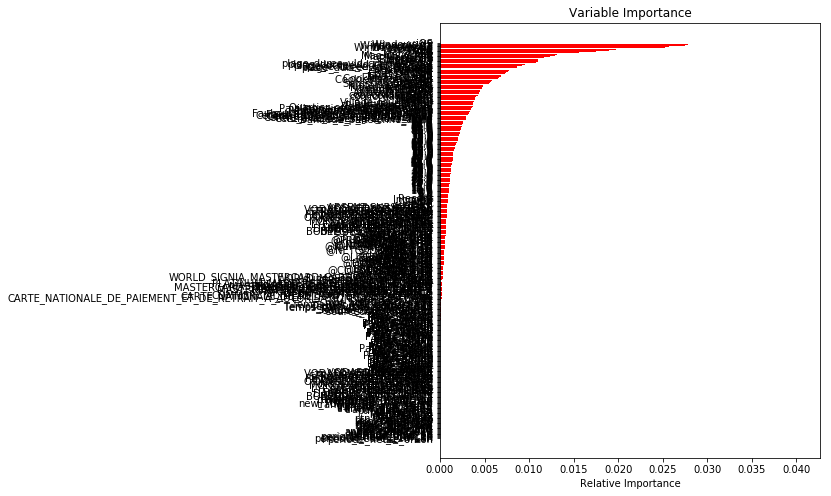

In [109]:
feature_importance = sorted(clf_rf_opt.feature_importances_)
# make importances relative to max importance
pos = np.linspace(1, XTrain.shape[1], XTrain.shape[1]) + .5
fig = plt.figure(1, figsize=(15, 8))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance, color='r', align='center')
plt.yticks(pos, list(XTrain))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [117]:
feature_importance

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.719180278148344e-09,
 1.0792485469886607e-07,
 1.563466916289172e-07,
 2.465820226060649e-07,
 3.154803856255133e-07,
 6.289241464536937e-07,
 1.1981411158192979e-06,
 3.3078774871382395e-06,
 7.355677120021001e-06,
 7.651362007183846e-06,
 9.51366978204874e-06,
 1.0002426537522955e-05,
 1.3073339789541102e-05,
 2.691896537047955

In [118]:
clf_rf_opt.feature_importances_

array([7.38972785e-03, 4.34349628e-03, 4.65862240e-03, 2.93728460e-03,
       5.30318577e-03, 3.83035540e-03, 4.87742262e-03, 8.65000486e-03,
       3.91437718e-03, 4.85415428e-03, 1.40429672e-03, 1.03263114e-03,
       7.60717409e-03, 1.20526518e-03, 2.25687561e-03, 1.46461147e-03,
       1.75483506e-03, 2.08937984e-03, 1.79952690e-03, 3.45139000e-03,
       1.26367594e-03, 1.16349607e-03, 5.78090517e-05, 9.86811018e-04,
       5.76190868e-04, 1.89619598e-02, 0.00000000e+00, 1.22385639e-03,
       5.65256121e-04, 4.54254567e-04, 9.51366978e-06, 5.50674953e-05,
       5.07579517e-03, 6.05292198e-04, 3.75925467e-04, 5.48360872e-03,
       3.96832033e-03, 8.64530352e-03, 6.90084409e-03, 6.13468565e-03,
       1.37563150e-02, 7.25383390e-03, 0.00000000e+00, 1.29491536e-02,
       4.28603080e-04, 1.02966594e-03, 7.32375892e-04, 3.94044001e-04,
       4.13057847e-04, 8.04653043e-04, 1.67917784e-04, 1.09372475e-03,
       2.22830619e-03, 9.71918028e-09, 0.00000000e+00, 4.20231111e-04,
      

##### Courbes ROC

In [110]:
from sklearn.metrics import roc_curve,auc
probas_rf = clf_rf_opt.predict_proba(XTest)
fpr_rf, tpr_rf, thresholds = roc_curve(YTest.ravel(), probas_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

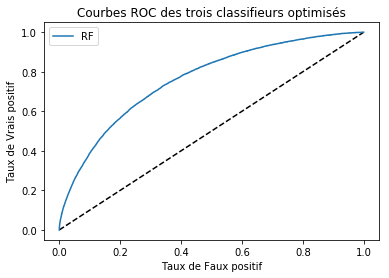

In [111]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF' % roc_auc_rf)
plt.xlabel('Taux de Faux positif')
plt.ylabel('Taux de Vrais positif')
plt.title('Courbes ROC des trois classifieurs optimisés')
plt.legend(loc="best");


In [112]:
print ("Avec la méthode de RF et Bagging, l'aire sous la courbe ROC est de: %f" % roc_auc_rf)

Avec la méthode de RF et Bagging, l'aire sous la courbe ROC est de: 0.761836


# CART

le taux d'erreur est 0.05905062203761534
la table de confusion est
 [[186212      0]
 [ 11686      0]]
Aire sous la courbe ROC
CART :               0.5


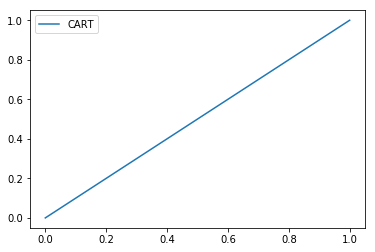

In [242]:
from sklearn.tree import DecisionTreeClassifier as CART

# construction du classifieur
clf = CART(criterion="entropy",max_depth=3,min_samples_leaf=20,min_impurity_decrease=0.01)
clf.fit(XTrain,YTrain)

# prédiction de l'échantillon test
YPred = clf.predict(XTest)

# taux d'erreur de l'échantillon test
TestError = np.mean(YTest!=YPred)
print("le taux d'erreur est",TestError)

# table de confusion
Table = sklearn.metrics.confusion_matrix(YTest,YPred)
print("la table de confusion est\n",Table)

# score, roc, AUC
Yproba_clf = clf.predict_proba(XTest)
from sklearn import metrics
fpr_clf, tpr_clf, thresholds_clf = metrics.roc_curve(YTest, Yproba_clf[:,0], pos_label=0)
plt.plot(fpr_clf,tpr_clf,label="CART")
plt.legend()
print("Aire sous la courbe ROC")
print("CART :              ",metrics.roc_auc_score(YTest, Yproba_clf[:,1]))

le taux d'erreur est 0.36947618107937225
la table de confusion est
 [[89553 34509]
 [57236 67013]]
Aire sous la courbe ROC
CART :               0.674347206377542


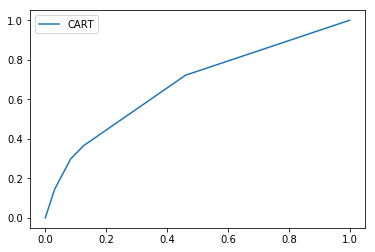

In [240]:
from sklearn.tree import DecisionTreeClassifier as CART

# construction du classifieur
clf = CART(criterion="entropy",max_depth=3,min_samples_leaf=20,min_impurity_decrease=0.01)
clf.fit(XTrain,YTrain)

# prédiction de l'échantillon test
YPred = clf.predict(XTest)

# taux d'erreur de l'échantillon test
TestError = np.mean(YTest!=YPred)
print("le taux d'erreur est",TestError)

# table de confusion
Table = sklearn.metrics.confusion_matrix(YTest,YPred)
print("la table de confusion est\n",Table)

# score, roc, AUC
Yproba_clf = clf.predict_proba(XTest)
from sklearn import metrics
fpr_clf, tpr_clf, thresholds_clf = metrics.roc_curve(YTest, Yproba_clf[:,0], pos_label=0)
plt.plot(fpr_clf,tpr_clf,label="CART")
plt.legend()
print("Aire sous la courbe ROC")
print("CART :              ",metrics.roc_auc_score(YTest, Yproba_clf[:,1]))

# Foret

le taux d'erreur est 0.05661502390120163
la table de confusion est
 [[186212      0]
 [ 11686      0]]
Aire sous la courbe ROC
Random Forest :      0.7588622949099082


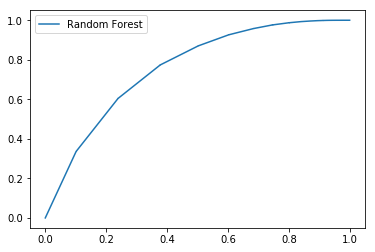

In [245]:
# construction du classifieur
foret = RandomForestClassifier(n_estimators=30, max_features=9)
foret.fit(XTrain,YTrain)

# prédiction de l'échantillon test
Pred = foret.predict(XTest)

# taux d'erreur de l'échantillon test
erreur = np.mean(YTest!=Pred)
print("le taux d'erreur est",erreur)

# table de confusion
Table = sklearn.metrics.confusion_matrix(YTest,YPred)
print("la table de confusion est\n",Table)

# score, roc, AUC
Yproba_foret = foret.predict_proba(XTest)
fpr_foret, tpr_foret, thresholds_foret = metrics.roc_curve(YTest, Yproba_foret[:,0], pos_label=0)
plt.plot(fpr_foret,tpr_foret,label="Random Forest")
plt.legend()
print("Aire sous la courbe ROC")
print("Random Forest :     ",metrics.roc_auc_score(YTest, Yproba_foret[:,1]))

# GBT

le taux d'erreur est 0.05799957553891399
la table de confusion est
 [[186212      0]
 [ 11686      0]]
Aire sous la courbe ROC
Gradient Boosting :  0.7994668155113986


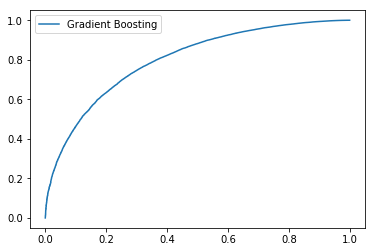

In [247]:
from sklearn.ensemble import GradientBoostingClassifier
# construction du classifieur
gbc = GradientBoostingClassifier(loss = 'exponential',max_depth = 4,learning_rate=0.2,n_estimators=100,n_iter_no_change = 10, validation_fraction = 0.02)
gbc.fit(XTrain,YTrain)

# prédiction de l'échantillon test
Pred = gbc.predict(XTest)

# taux d'erreur de l'échantillon test
erreur = np.mean(YTest!=Pred)
print("le taux d'erreur est",erreur)

# table de confusion
Table = sklearn.metrics.confusion_matrix(YTest,YPred)
print("la table de confusion est\n",Table)

# score, roc, AUC
Yproba_gbc = gbc.predict_proba(XTest)
fpr_gbc, tpr_gbc, thresholds_gbc = metrics.roc_curve(YTest, Yproba_gbc[:,0], pos_label=0)
plt.plot(fpr_gbc,tpr_gbc, label="Gradient Boosting")
plt.legend()
print("Aire sous la courbe ROC")
print("Gradient Boosting : ",metrics.roc_auc_score(YTest, Yproba_gbc[:,1]))